# Task 5: Unsupervised analysis

#### Clustering is aimed at identifying natural groups in data. There is a wide variety of unsupervised classification techniques, which, depending on the data set under analysis, partition data differently. The purpose of this theme is to understand the principles behind each clustering method and, therefore, to choose the most appropriate method to be applied in a given context.
#### Most methods require pre-determined number of groups. However, there are also automatic ways of identifying a graphical representation of a numeric index based on the number of groups followed by the elbow or the maximization of a score such as Silhouette-Width.
#### Unsupervised classification methods to work on this theme:
1. Hierarchical algorithms: single link, full link, average link, Ward variance
1. Density based algorithms: DBSCAN or variations
1. The k-Means algorithm
1. Expectation-Maximization (EM) clustering
1. Self-organizing maps (SOM)

#### For each of the datasets here, we will specify which algorithms are best suited to identify natural groups - as they appear to a data view justifying the answer and considering the number of known classes.
-------


#### Imports

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics.cluster import adjusted_rand_score


#### Functions to plot different types of clustering

In [2]:
def plot_clusters(data, ax):
    sns.scatterplot(
        x='x',
        y='y',
        data=data, 
        hue='class', 
        ax=ax,
        palette=sns.color_palette("muted", n_colors=len(set(data['class'])))
    )

def plot_hierarhical_cluster(data, linkage, n_clusters, ax, affinity='euclidean'):
    clustering = AgglomerativeClustering(
        linkage=linkage, 
        n_clusters=n_clusters,
        affinity=affinity
    ).fit(data.iloc[:, 0:2])
    
    clustered_data = data.copy()
    clustered_data['class'] = clustering.labels_
    plot_clusters(clustered_data, ax)
    
    adjusted_index = adjusted_rand_score(clustering.labels_, data['class'])
    ax.set_title(linkage + " linkage. Adjusted Index: " + str(adjusted_index))

    
def plot_kmeans_cluster(data, n_clusters, ax,  init='k-means++'):
    clustering = KMeans(n_clusters=n_clusters, init=init, random_state=23) \
                                    .fit(data.iloc[:, 0:2])

    clustered_data = data.copy()
    clustered_data['class'] = clustering.labels_
    plot_clusters(clustered_data, ax)
    
    adjusted_index = adjusted_rand_score(clustering.labels_, data['class'])
    ax.set_title("KMeans. Adjusted Index: " + str(adjusted_index))
    
    
def plot_dbscan_cluster(data, ax, eps=0.5, min_samples=5, metric='euclidean'):
    clustering = DBSCAN(eps=eps, min_samples=min_samples, metric=metric) \
                    .fit(data.iloc[:, 0:2])

    clustered_data = data.copy()
    clustered_data['class'] = clustering.labels_
    plot_clusters(clustered_data, ax)
    
    adjusted_index = adjusted_rand_score(clustering.labels_, data['class'])
    ax.set_title("DBSCAN. Adjusted Index: " + str(adjusted_index))

### Smile 

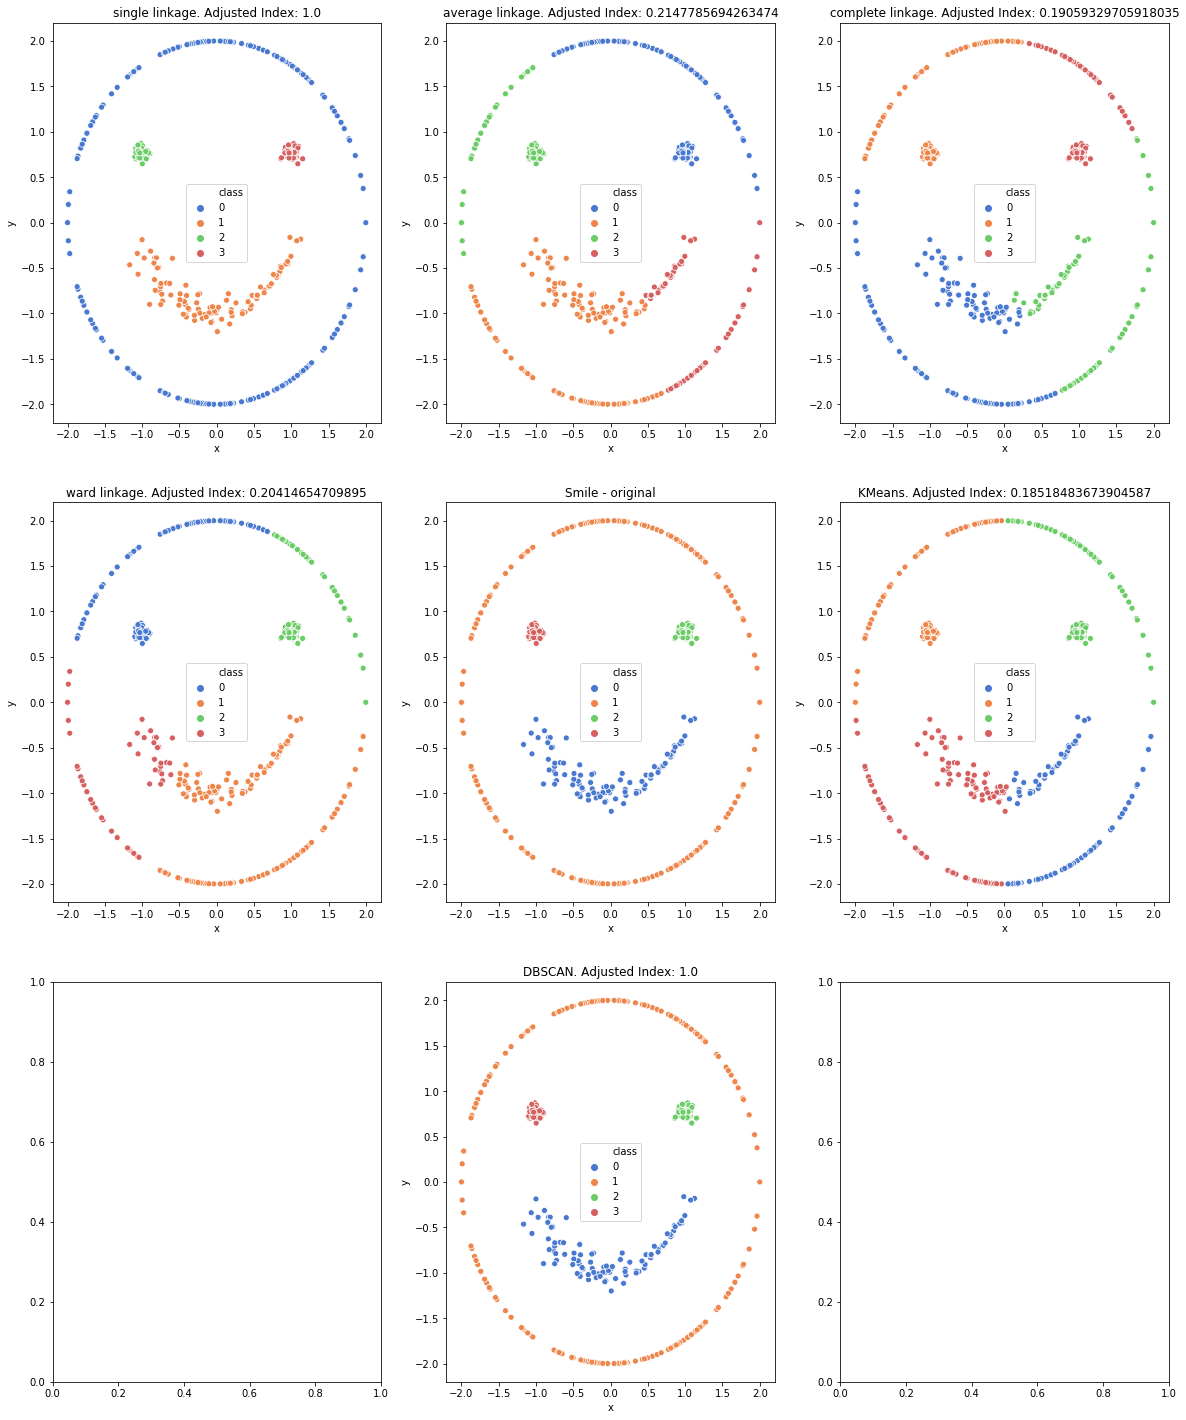

In [3]:
data = pd.read_csv('./data/smile.csv', sep=',', header=None)
data.columns = ['x','y','class']
number_of_classes = len(data['class'].unique())

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 25))
    
plot_clusters(data, axs[1][1])
axs[1][1].set_title("Smile - original")

plot_hierarhical_cluster(data, 'single', number_of_classes, axs[0][0])
plot_hierarhical_cluster(data, 'average', number_of_classes, axs[0][1])
plot_hierarhical_cluster(data, 'complete', number_of_classes, axs[0][2])
plot_hierarhical_cluster(data, 'ward', number_of_classes, axs[1][0])

plot_kmeans_cluster(data, number_of_classes, axs[1][2])

plot_dbscan_cluster(data, axs[2][1], 0.6)


### As indicated by the Adjusted index property the best clustering method is single linkage and DBScan. Single linkage works because we have clearly separated clusters with significant gap between them. DBscan takes advantage of the crowded regions of the feature space, where many data points are close together (dense regions in feature space).
-------------

### 2 dimmensions 10 classes

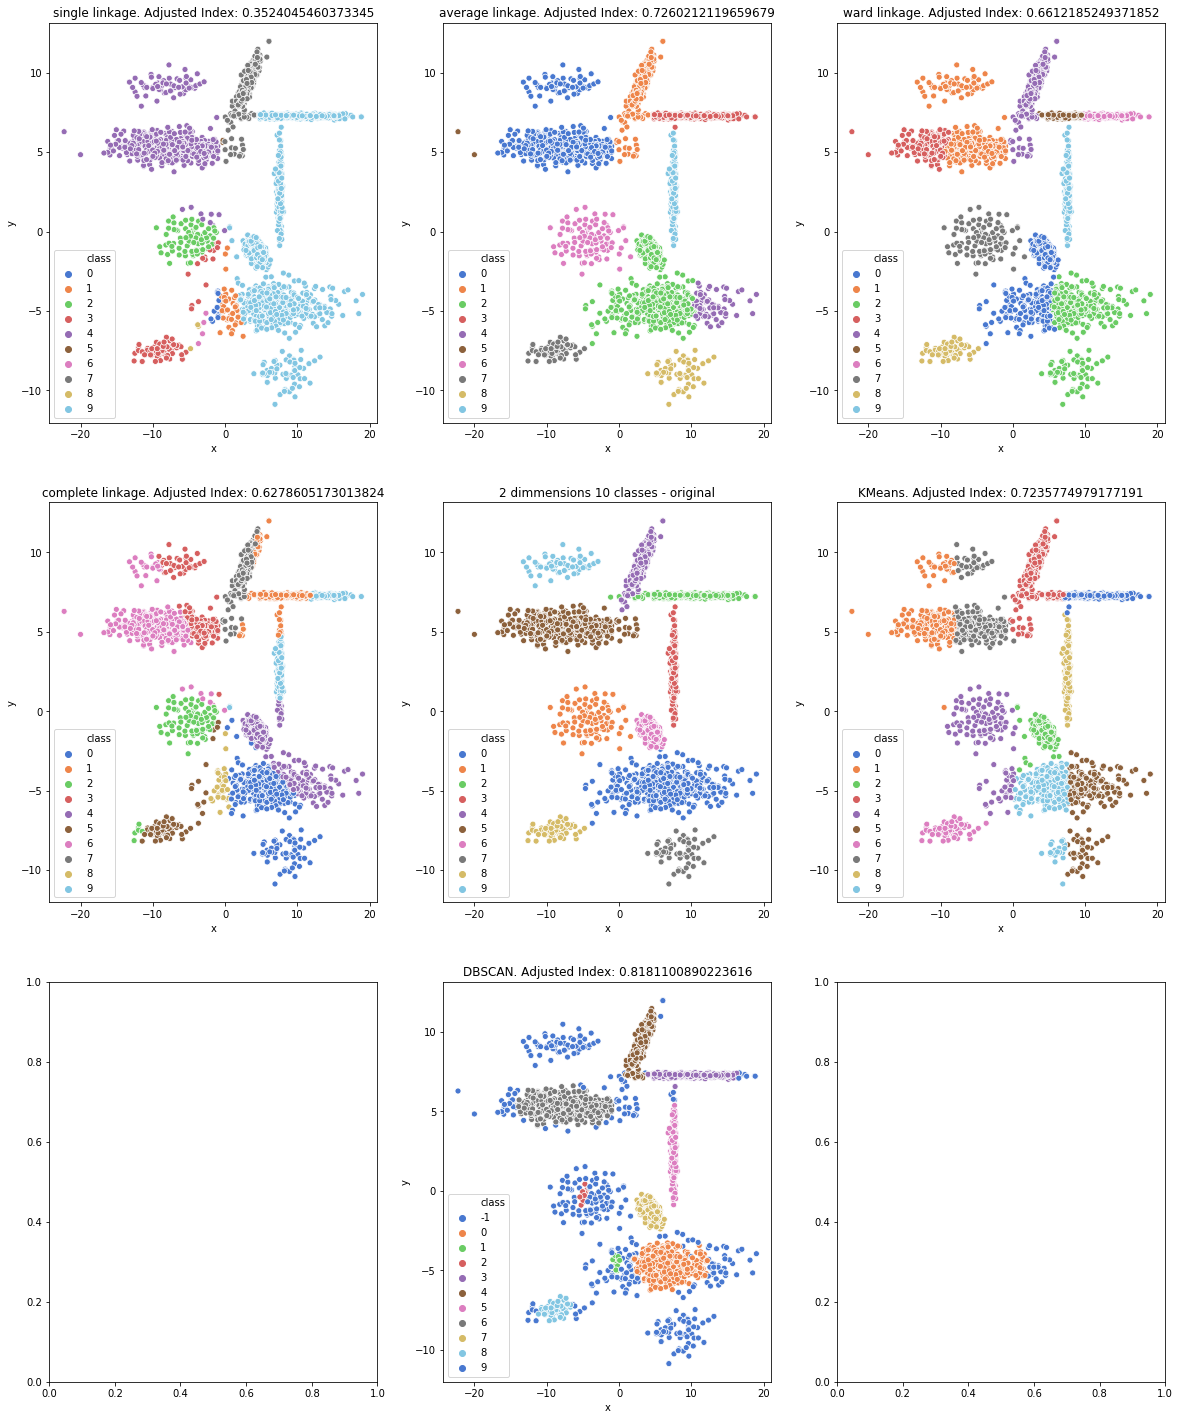

In [4]:
data = pd.read_csv('./data/2d-10c.dat', sep=' ', header=None)
data.columns = ['x','y','class']
number_of_classes = len(data['class'].unique())

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 25))
    
plot_clusters(data, axs[1][1])
axs[1][1].set_title("2 dimmensions 10 classes - original")

plot_hierarhical_cluster(data, 'single', number_of_classes, axs[0][0], 'cosine')
plot_hierarhical_cluster(data, 'average', number_of_classes, axs[0][1], 'manhattan')
plot_hierarhical_cluster(data, 'complete', number_of_classes, axs[1][0], 'cosine')
plot_hierarhical_cluster(data, 'ward', number_of_classes, axs[0][2])

plot_kmeans_cluster(data, number_of_classes, axs[1][2])

plot_dbscan_cluster(data, axs[2][1], 0.57, 10)


### As indicated by the Adjusted Rand Index property the best clustering method is DBScan. Again, DBscan can explore the dense points in the feature space. Even though kmeans and hierarhical clustering average have good adjusted index, we can observe that the centroids that they find are somehow in the middle of two original clusters
-------------

### Square

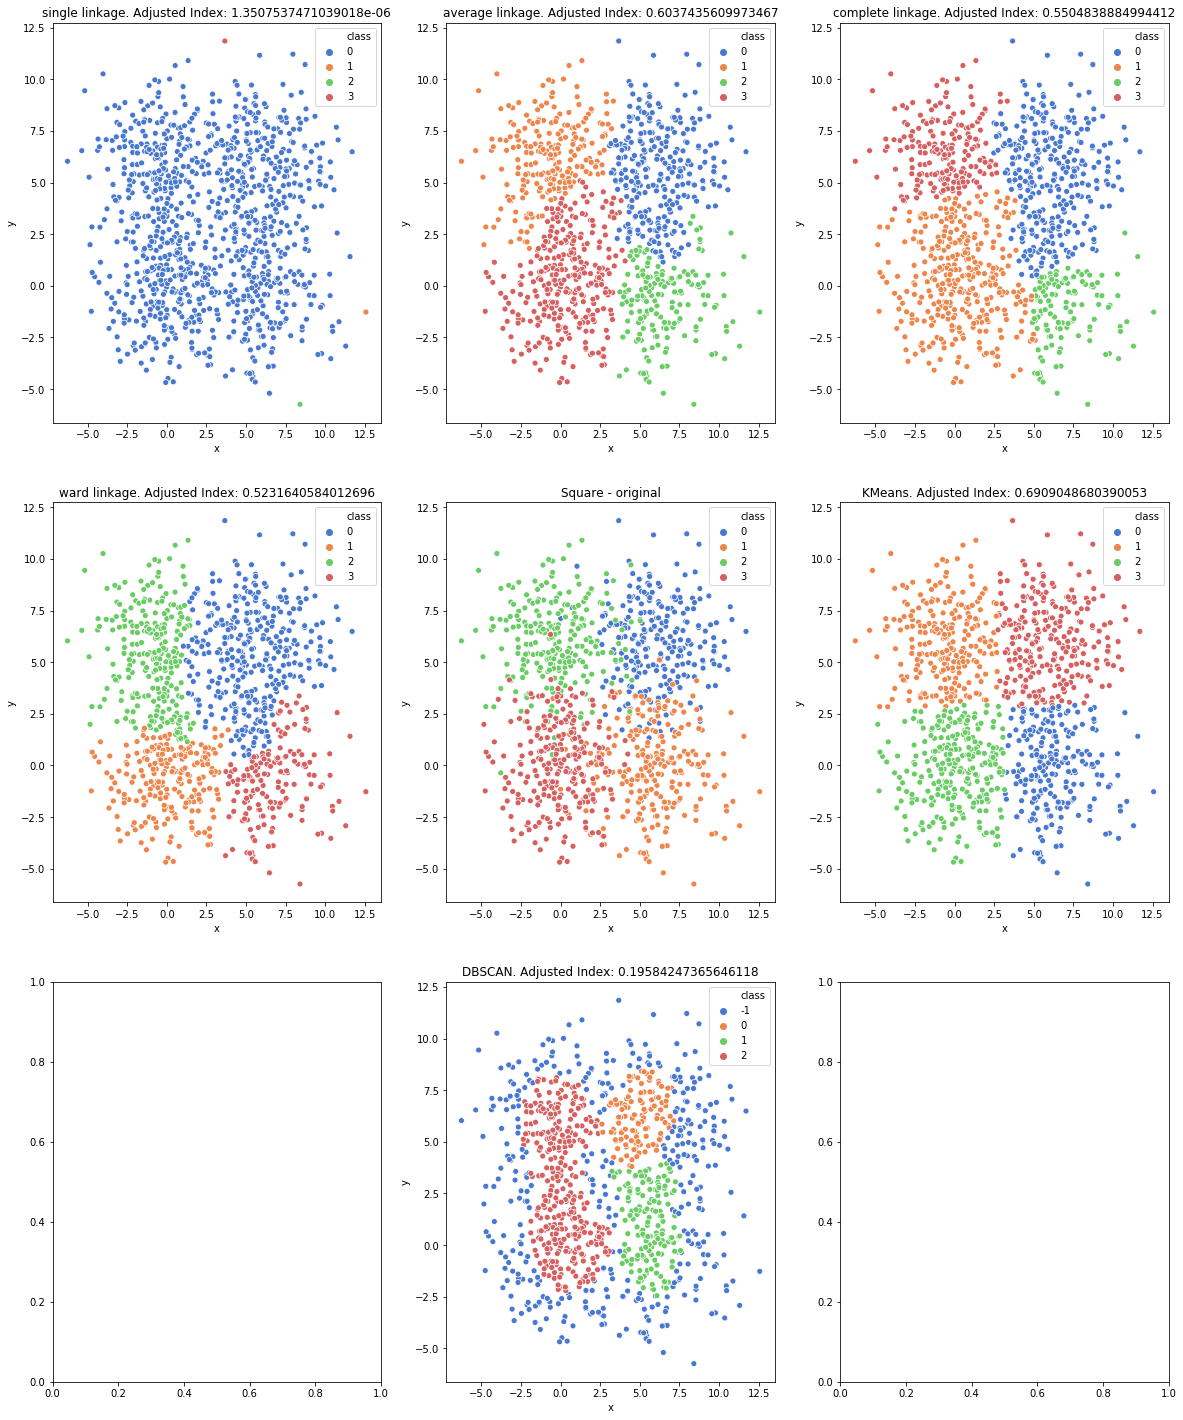

In [5]:
data = pd.read_csv('./data/square.data', sep=' ', header=None)
data.columns = ['x','y','class']
number_of_classes = len(data['class'].unique())

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 25))
    
plot_clusters(data, axs[1][1])
axs[1][1].set_title("Square - original")

plot_hierarhical_cluster(data, 'single', number_of_classes, axs[0][0])
plot_hierarhical_cluster(data, 'average', number_of_classes, axs[0][1])
plot_hierarhical_cluster(data, 'complete', number_of_classes, axs[0][2])
plot_hierarhical_cluster(data, 'ward', number_of_classes, axs[1][0])

plot_kmeans_cluster(data, number_of_classes, axs[1][2])

plot_dbscan_cluster(data, axs[2][1], 1.1, 30)

### As expected, Kmeans does the best clustering here because the clusters have somehow a spherical shape. Average and complete linkage find close clustering too.
-------------

### Long

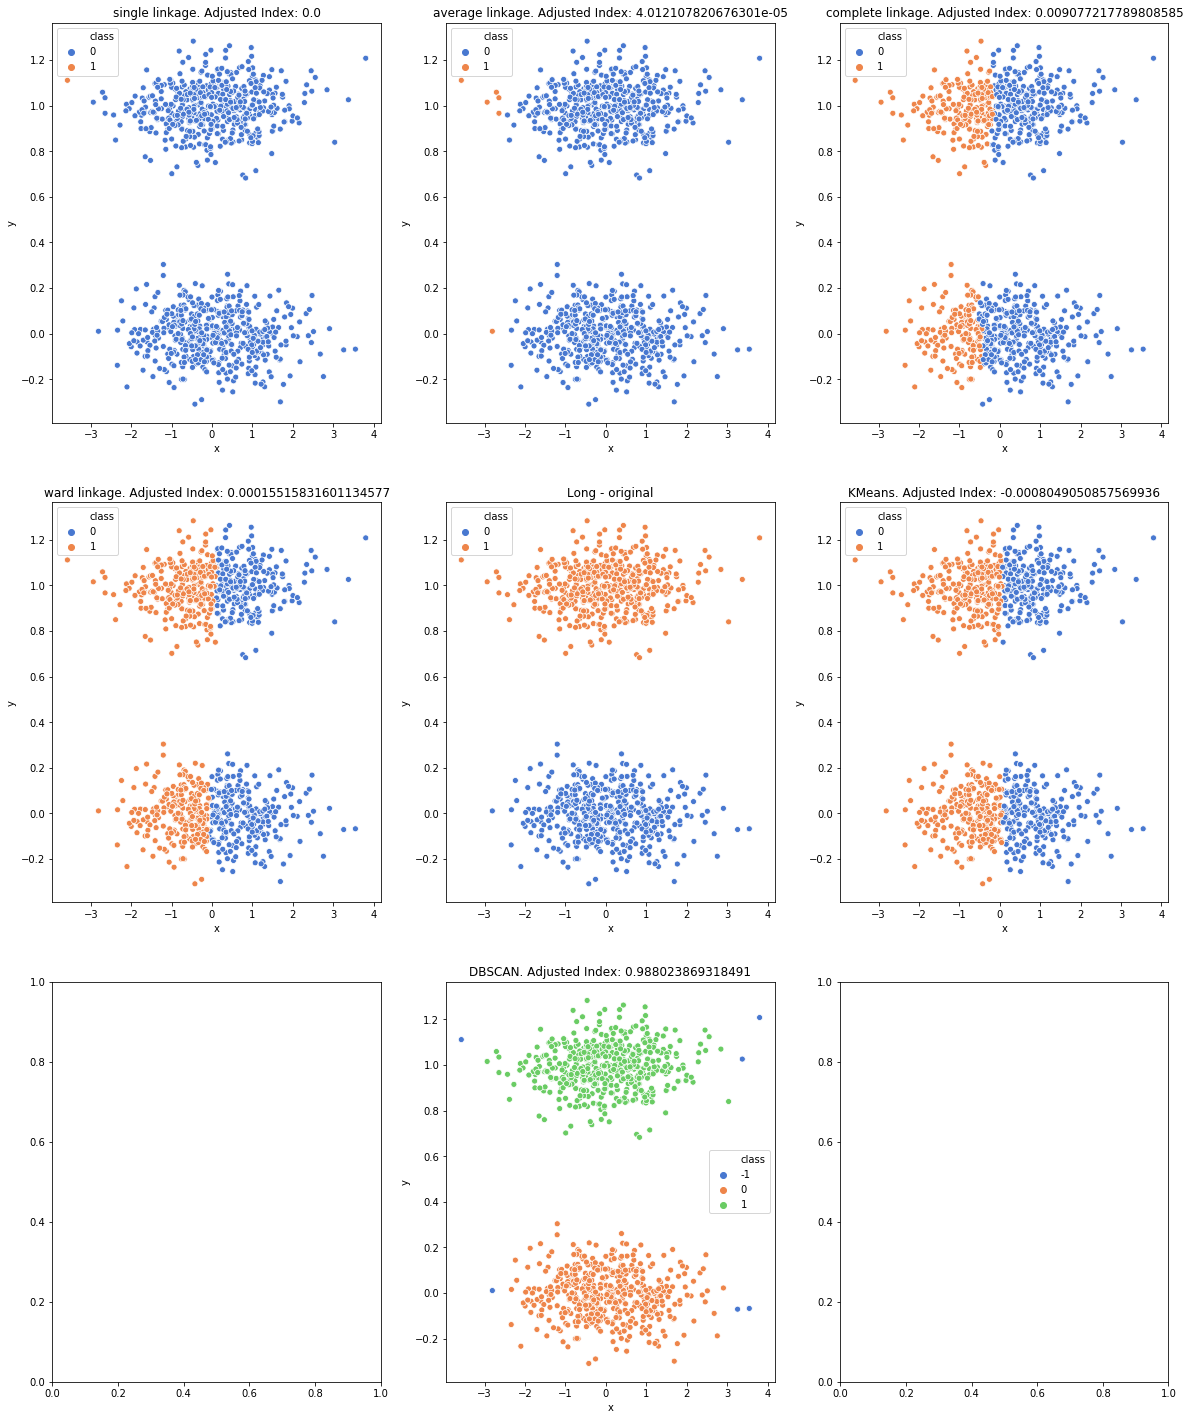

In [6]:
data = pd.read_csv('./data/long.data', sep=' ', header=None)
data.columns = ['x','y','class']
number_of_classes = len(data['class'].unique())

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 25))
    
plot_clusters(data, axs[1][1])
axs[1][1].set_title("Long - original")

plot_hierarhical_cluster(data, 'single', number_of_classes, axs[0][0])
plot_hierarhical_cluster(data, 'average', number_of_classes, axs[0][1])
plot_hierarhical_cluster(data, 'complete', number_of_classes, axs[0][2])
plot_hierarhical_cluster(data, 'ward', number_of_classes, axs[1][0])

plot_kmeans_cluster(data, number_of_classes, axs[1][2])

plot_dbscan_cluster(data, axs[2][1], 0.3, 3)

### DBScan does the best here. We set the distance very close (0.3) and just 3 points as to min_sample parameter to keep clusters as dense as possible
-------------

### 2 dimmensions 3 clusters

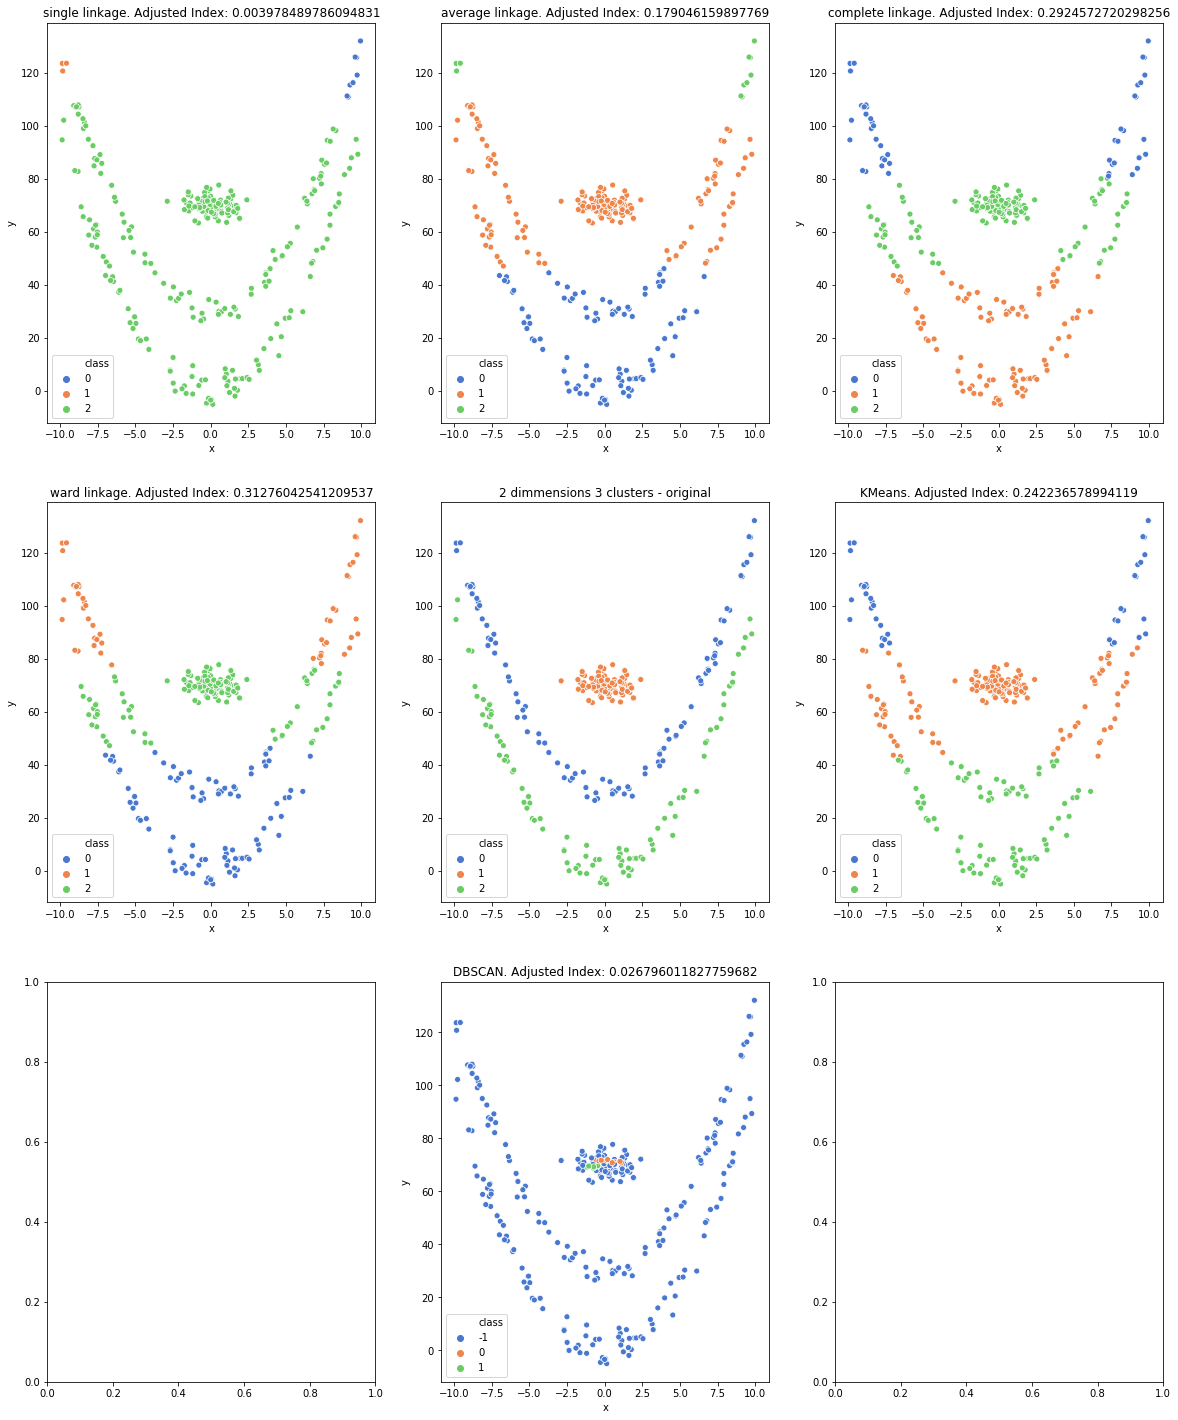

In [7]:
data = pd.read_csv('./data/order2-3clust.csv', sep=',', header=None)
data.columns = ['x','y','class']
number_of_classes = len(data['class'].unique())

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 25))
    
plot_clusters(data, axs[1][1])
axs[1][1].set_title("2 dimmensions 3 clusters - original")

plot_hierarhical_cluster(data, 'single', number_of_classes, axs[0][0])
plot_hierarhical_cluster(data, 'average', number_of_classes, axs[0][1])
plot_hierarhical_cluster(data, 'complete', number_of_classes, axs[0][2])
plot_hierarhical_cluster(data, 'ward', number_of_classes, axs[1][0])

plot_kmeans_cluster(data, number_of_classes, axs[1][2])

plot_dbscan_cluster(data, axs[2][1], 0.5, 7)

#### As indicated by the Adjusted index property the best clustering method is single linkage and DBScan
-------------

### Iris

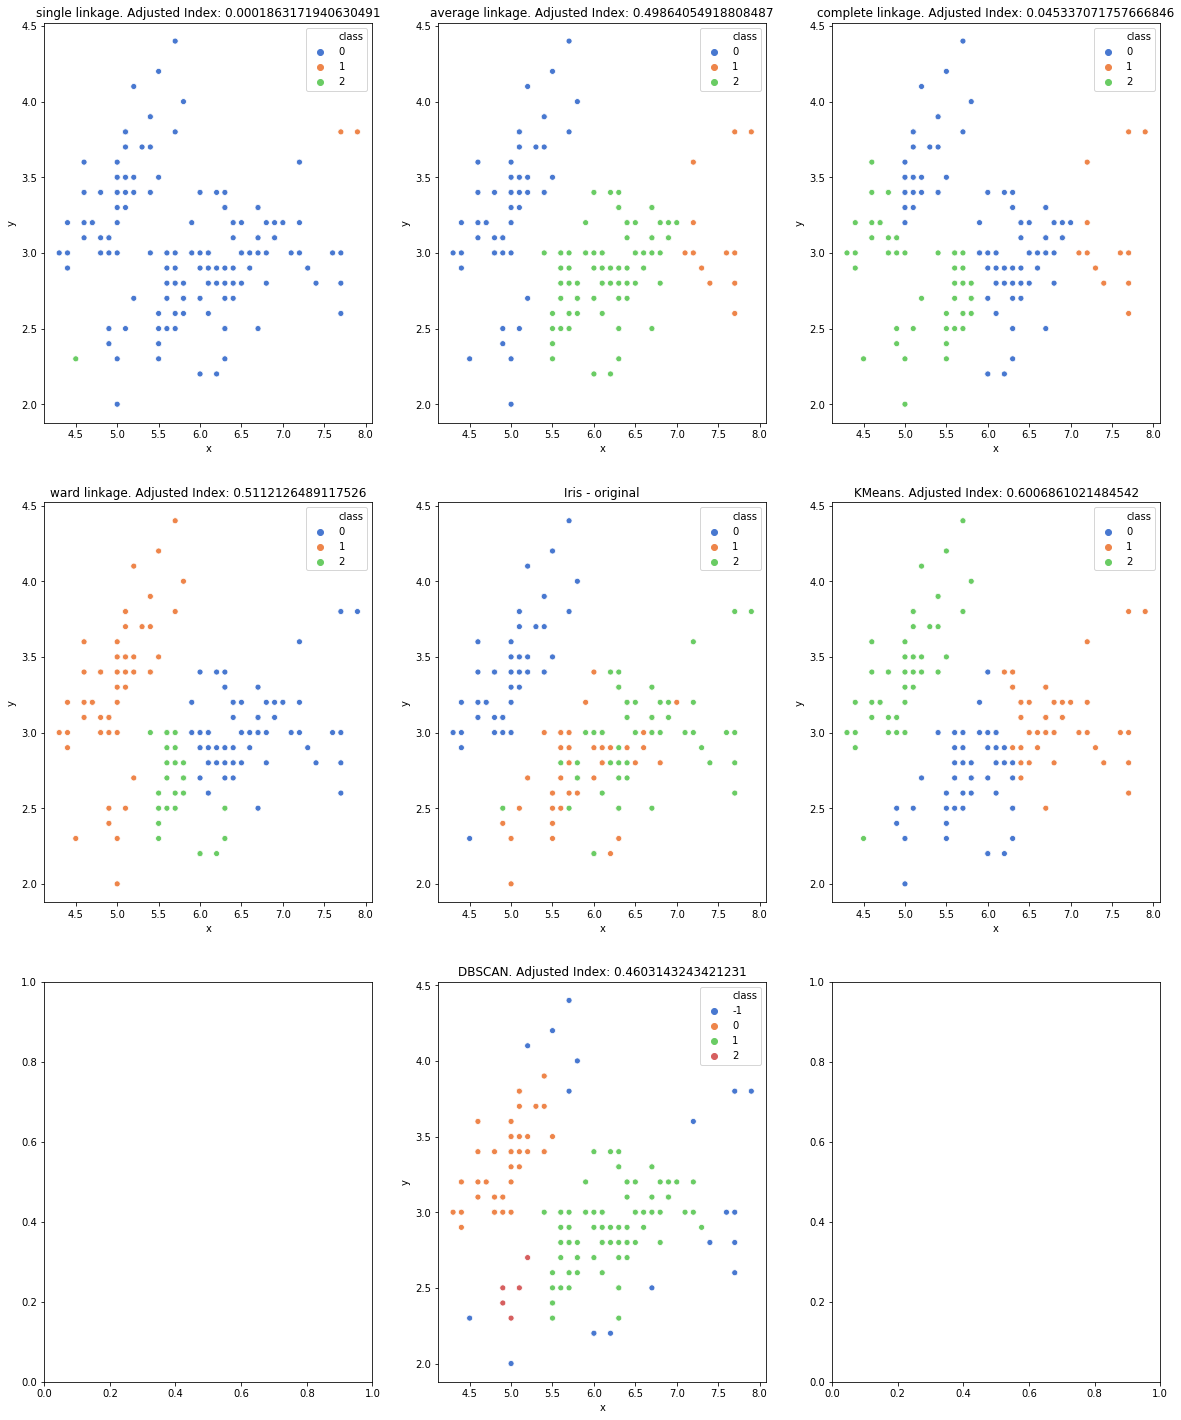

In [8]:
data = pd.read_csv('./data/iris.csv', sep=',', header=None)
data.columns = ['x','y','z','t', 'class']
number_of_classes = len(data['class'].unique())

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 25))
    
plot_clusters(data, axs[1][1])
axs[1][1].set_title("Iris - original")

plot_hierarhical_cluster(data, 'single', number_of_classes, axs[0][0])
plot_hierarhical_cluster(data, 'average', number_of_classes, axs[0][1])
plot_hierarhical_cluster(data, 'complete', number_of_classes, axs[0][2])
plot_hierarhical_cluster(data, 'ward', number_of_classes, axs[1][0])

plot_kmeans_cluster(data, number_of_classes, axs[1][2])

plot_dbscan_cluster(data, axs[2][1], 0.25, 5)

### KMeans finds the best clustering because again the original clusters are in a spherical shape
-------------